In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [26]:
train_dir = '../thesis_task/dog-vs-cat/dogvscat/train'
test_dir = '../thesis_task/dog-vs-cat/dogvscat/test'

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [31]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [32]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39256\113228744.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)


Epoch 1/10
25/25 [==============================] - 46s 2s/step - loss: 2.0376 - accuracy: 0.5080 - val_loss: 0.6981 - val_accuracy: 0.4250
Epoch 2/10
25/25 [==============================] - 36s 1s/step - loss: 0.6956 - accuracy: 0.5220 - val_loss: 0.6924 - val_accuracy: 0.5250
Epoch 3/10
25/25 [==============================] - 36s 1s/step - loss: 0.7346 - accuracy: 0.4920 - val_loss: 0.6914 - val_accuracy: 0.5250
Epoch 4/10
25/25 [==============================] - 36s 1s/step - loss: 0.7022 - accuracy: 0.5300 - val_loss: 0.7083 - val_accuracy: 0.5000
Epoch 5/10
25/25 [==============================] - 37s 1s/step - loss: 0.7670 - accuracy: 0.5580 - val_loss: 0.6781 - val_accuracy: 0.5750
Epoch 6/10
25/25 [==============================] - 37s 1s/step - loss: 0.7017 - accuracy: 0.6000 - val_loss: 0.7390 - val_accuracy: 0.4500
Epoch 7/10
25/25 [==============================] - 37s 1s/step - loss: 0.6677 - accuracy: 0.6260 - val_loss: 0.6866 - val_accuracy: 0.5500
Epoch 8/10
25/25 [==

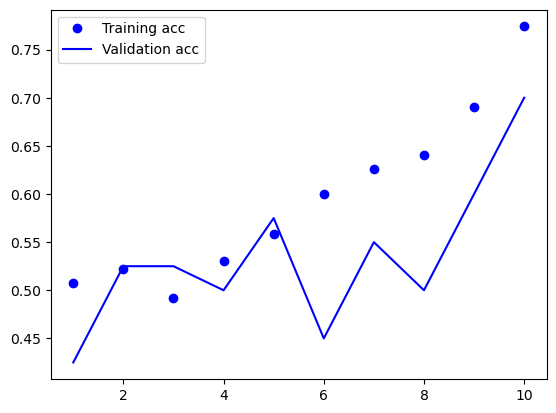

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

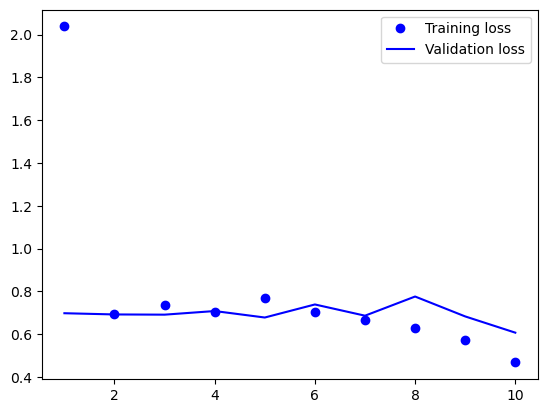

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [40]:
model.save('catvsdog.h5')

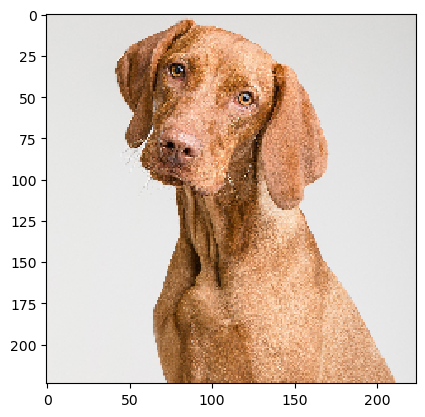

In [46]:
from tensorflow.keras.preprocessing import image
path ='../thesis_task/dog-vs-cat/dogvscat/train/1/14.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [47]:
import numpy as np
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [49]:
img_array=img_array.reshape(1,224,224,3)

In [50]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 139ms/step
dog
